In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, recall_score, f1_score


In [ ]:
data = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
(X_train, y_train),(X_test, y_test) = data

In [ ]:
X_train.shape

(50000, 32, 32, 3)

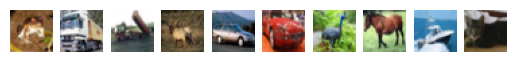

In [ ]:
fig, axes = plt.subplots(1, 10)
for i in range(10):
  axes[i].imshow(X_train[i, :, :])
  axes[i].axis('off')

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
model = keras.Sequential()

In [ ]:
# Capa de convolución
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))


In [ ]:
# Capa de MaxPooling
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [ ]:
# Capa de Dropout
model.add(layers.Dropout(0.2))

In [ ]:
# Capa de aplanamiento
model.add(layers.Flatten())

In [ ]:
# Capas del clasificador
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4502 - accuracy: 0.8419 - val_loss: 0.8674 - val_accuracy: 0.7328
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4186 - accuracy: 0.8517 - val_loss: 0.8400 - val_accuracy: 0.7354
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3934 - accuracy: 0.8599 - val_loss: 0.8917 - val_accuracy: 0.7327
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3677 - accuracy: 0.8700 - val_loss: 0.8545 - val_accuracy: 0.7372
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3528 - accuracy: 0.8745 - val_loss: 0.9222 - val_accuracy: 0.7382
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3301 - accuracy: 0.8826 - val_loss: 0.9438 - val_accuracy: 0.7325
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3194 - accuracy: 0.8881 - val_loss: 0.9484 - val_accuracy

In [ ]:

y_pred_probs = model.predict(X_test)


y_pred = y_pred_probs.argmax(axis=1)


test_accuracy = accuracy_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1_score = f1_score(y_test, y_pred, average='weighted')

print('Precisión en el conjunto de prueba:', test_accuracy)
print('Recall en el conjunto de prueba:', test_recall)
print('F1-score en el conjunto de prueba:', test_f1_score)

313/313 [==============================] - 2s 4ms/step
Precisión en el conjunto de prueba: 0.7343
Recall en el conjunto de prueba: 0.7343
F1-score en el conjunto de prueba: 0.7339462612911705
